# Deep Learning Project
## Artificial Neural Network for house pricing prediction regression <br>

#### Author: Piotr Druzdzel
#### E-mail: piotr.druzdzel@gmail.com <br>

#### Data source: https://github.com/Pierian-Data

#### Variables Description Data Type: <br>
id  - Notation for a house - Numeric <br>
date - Date house was sold - String <br>
price - Price is prediction target - Numeric <br>
bedrooms - number of Bedrooms/House - Numeric <br>
bathrooms - Number of bathrooms/bedrooms - Numeric <br>
sqftliving - square footage of the home - Numeric sqftlot square footage of the lot - Numeric <br>
floors - Total floors (levels) in house - Numeric <br>
waterfront - House which has a view to a waterfront - Numeric <br>
view - Has been viewed - Numeric <br>
condition - How good the condition is (Overall). 1 indicates worn out property and 5 excellent - Numeric <br>
grade - overall grade given to the housing unit, based on King County grading system. 1 poor, 13 excellent - Numeric <br>
sqftabove - square footage of house apart from basement Numeric sqftbasement square footage of the basement - Numeric <br>
yrbuilt - Built Year Numeric yrrenovated Year when house was renovated - Numeric
zipcode - zip - Numeric <br>
lat - Latitude coordinate - Numeric <br>
long - Longitude coordinate - Numeric <br>
sqftliving15 - Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area - Numeric <br>
sqftlot15 - lotSize area in 2015(implies some renovations) - Numeric <br>

#### Timing the script:

In [1]:
from datetime import datetime
startTime = datetime.now()

#### Dark theme fix:

In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

#### Basic libraries:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Pandas visible output size customization:

In [4]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

#### Read the data:

In [5]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


#### Checking for missing data:

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Basic statistics:

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Basic EDA:

#### Price:

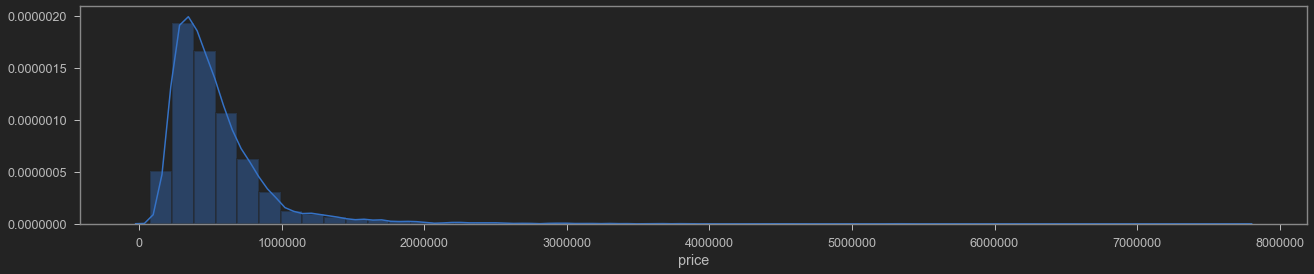

In [9]:
plt.figure(figsize=(22,4))
sns.distplot(df['price'], hist_kws=dict(edgecolor="k", linewidth=2));

#### Bedrooms:

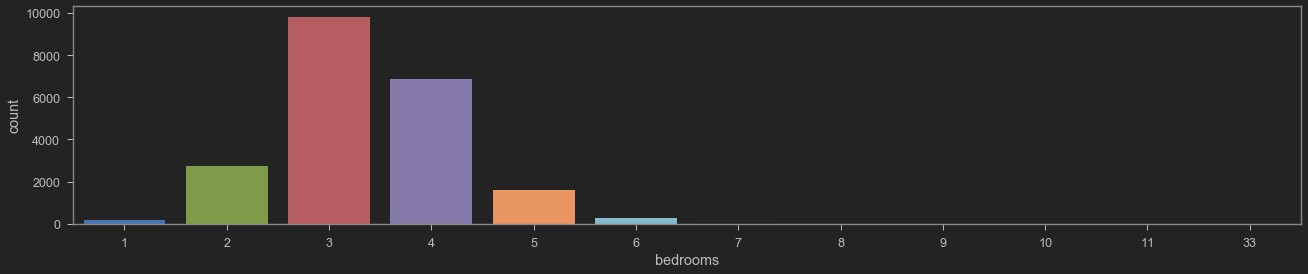

In [10]:
plt.figure(figsize=(22,4))
sns.countplot(df['bedrooms']);

#### Correlation with price:

In [11]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

I looks like size plays expectadly a large role in the house price.

#### Size vs price:

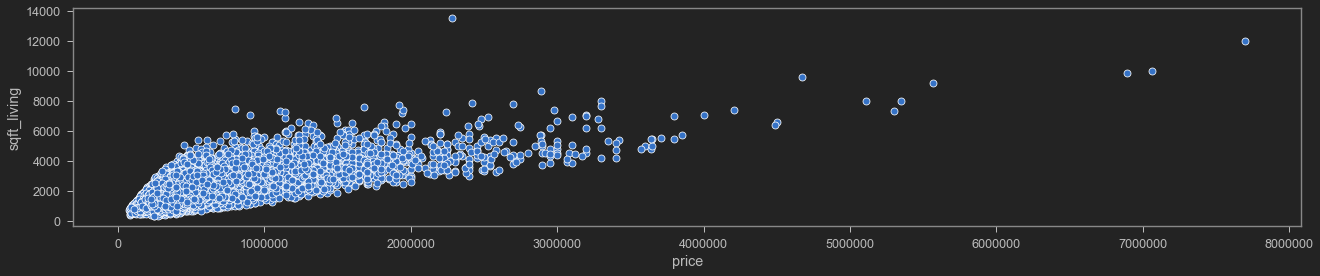

In [12]:
plt.figure(figsize=(22,4))
sns.scatterplot(x=df['price'], y=df['sqft_living']);

#### Bedrooms vs price:

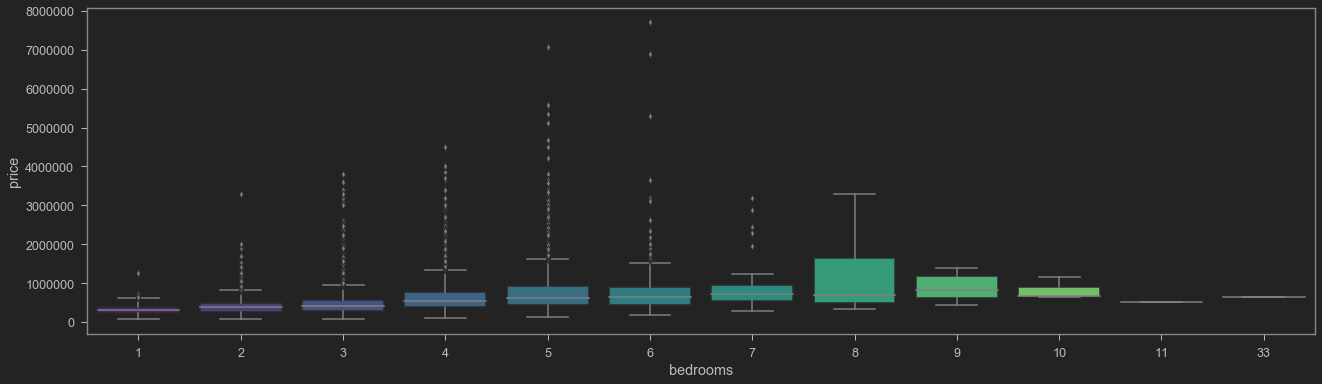

In [13]:
plt.figure(figsize=(22,6))
sns.boxplot(x=df['bedrooms'], 
            y=df['price'], 
            palette='viridis',
            flierprops=dict(markerfacecolor='grey'),
            whiskerprops=dict(color='grey'),
            capprops=dict(color='grey'),
            medianprops=dict(color='grey'));

#### Grade vs price:

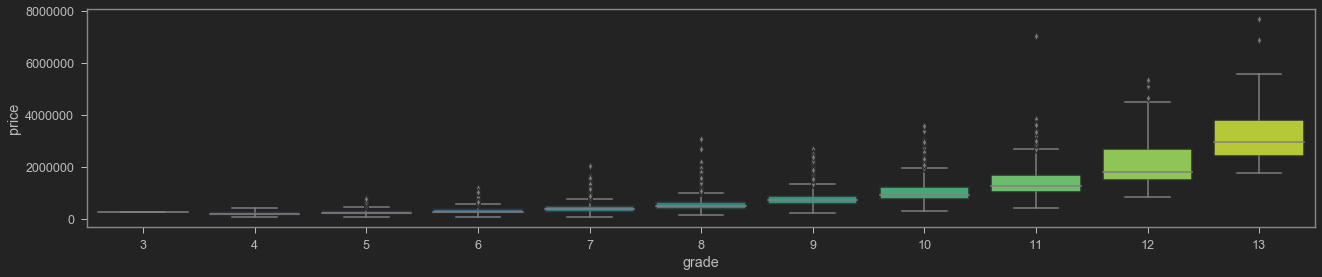

In [14]:
plt.figure(figsize=(22,4))
sns.boxplot(x=df['grade'], 
            y=df['price'], 
            palette='viridis',
            flierprops=dict(markerfacecolor='grey'),
            whiskerprops=dict(color='grey'),
            capprops=dict(color='grey'),
            medianprops=dict(color='grey'));

#### Expensive areas:

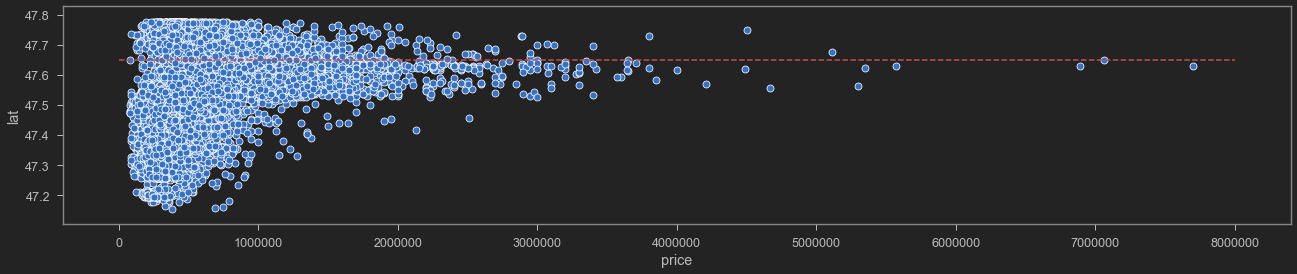

In [15]:
plt.figure(figsize=(22,4))
sns.scatterplot(x=df['price'], y=df['lat']);
plt.hlines(y=47.65, xmin=0, xmax=8000000, colors='r', linestyles={'dashed'});

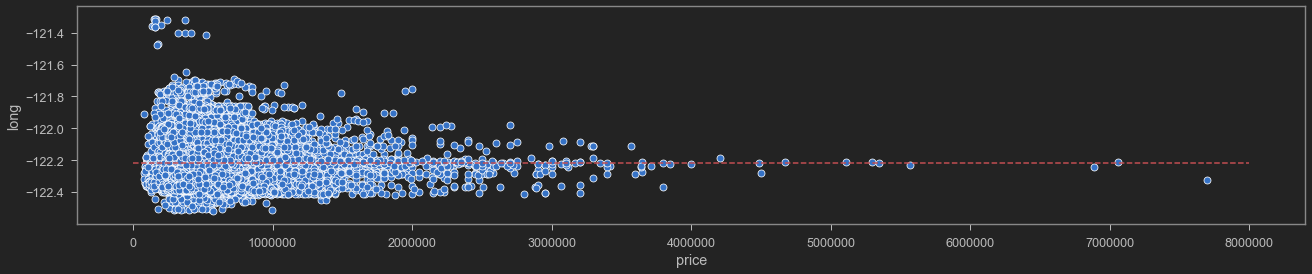

In [16]:
plt.figure(figsize=(22,4))
sns.scatterplot(x=df['price'], y=df['long']);
plt.hlines(y=-122.22, xmin=0, xmax=8000000, colors='r', linestyles={'dashed'});

#### Basemap map plotting:

In [17]:
import os
os.environ["PROJ_LIB"] = "C:\\Users\PDL3\\Anaconda3\\Library\\share";
from mpl_toolkits.basemap import Basemap

#### All the houses around Seattle:

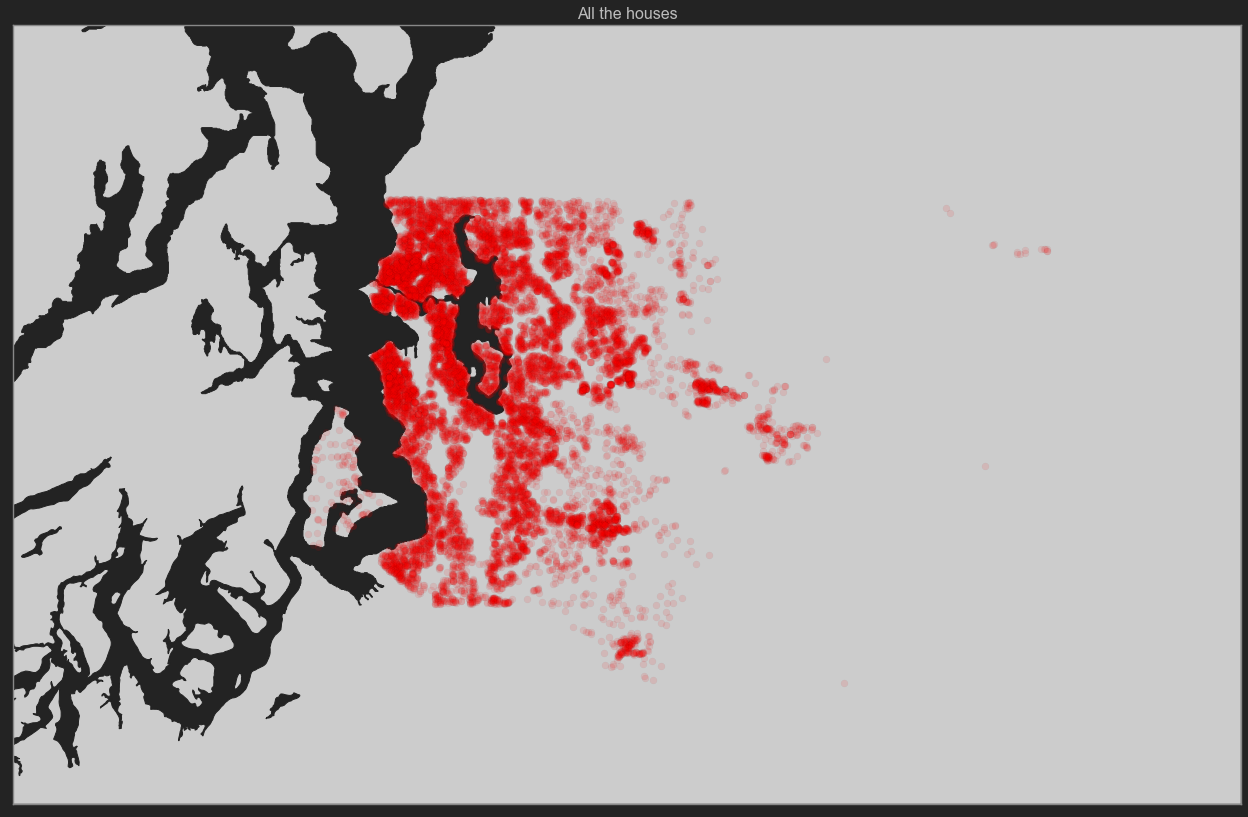

In [18]:
fig = plt.figure(figsize=(22,22))

m = Basemap(projection = 'mill',
           llcrnrlat = 47,
           urcrnrlat = 48,
            
           llcrnrlon = -123,
           urcrnrlon = -121,
            
           resolution = 'f')

m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents()

m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])

sites_lat_y = df['lat'].to_numpy()
sites_lon_x = df['long'].to_numpy()

colors = ['red']

m.scatter(sites_lon_x,
          sites_lat_y,
          latlon = True, 
          s = 50, 
          c = colors, 
          marker = 'o', 
          alpha = 0.1, 
          edgecolor = 'k', 
          linewidth = 0.2, 
          zorder = 2)

plt.title('All the houses', fontsize=16)

plt.show()

#### Only very expensive houses:

In [19]:
exp_house_lat = df[df['price'] > 3000000]['lat']
exp_house_lng = df[df['price'] > 3000000]['long']

#### Expensive houses above 3 mln. $:

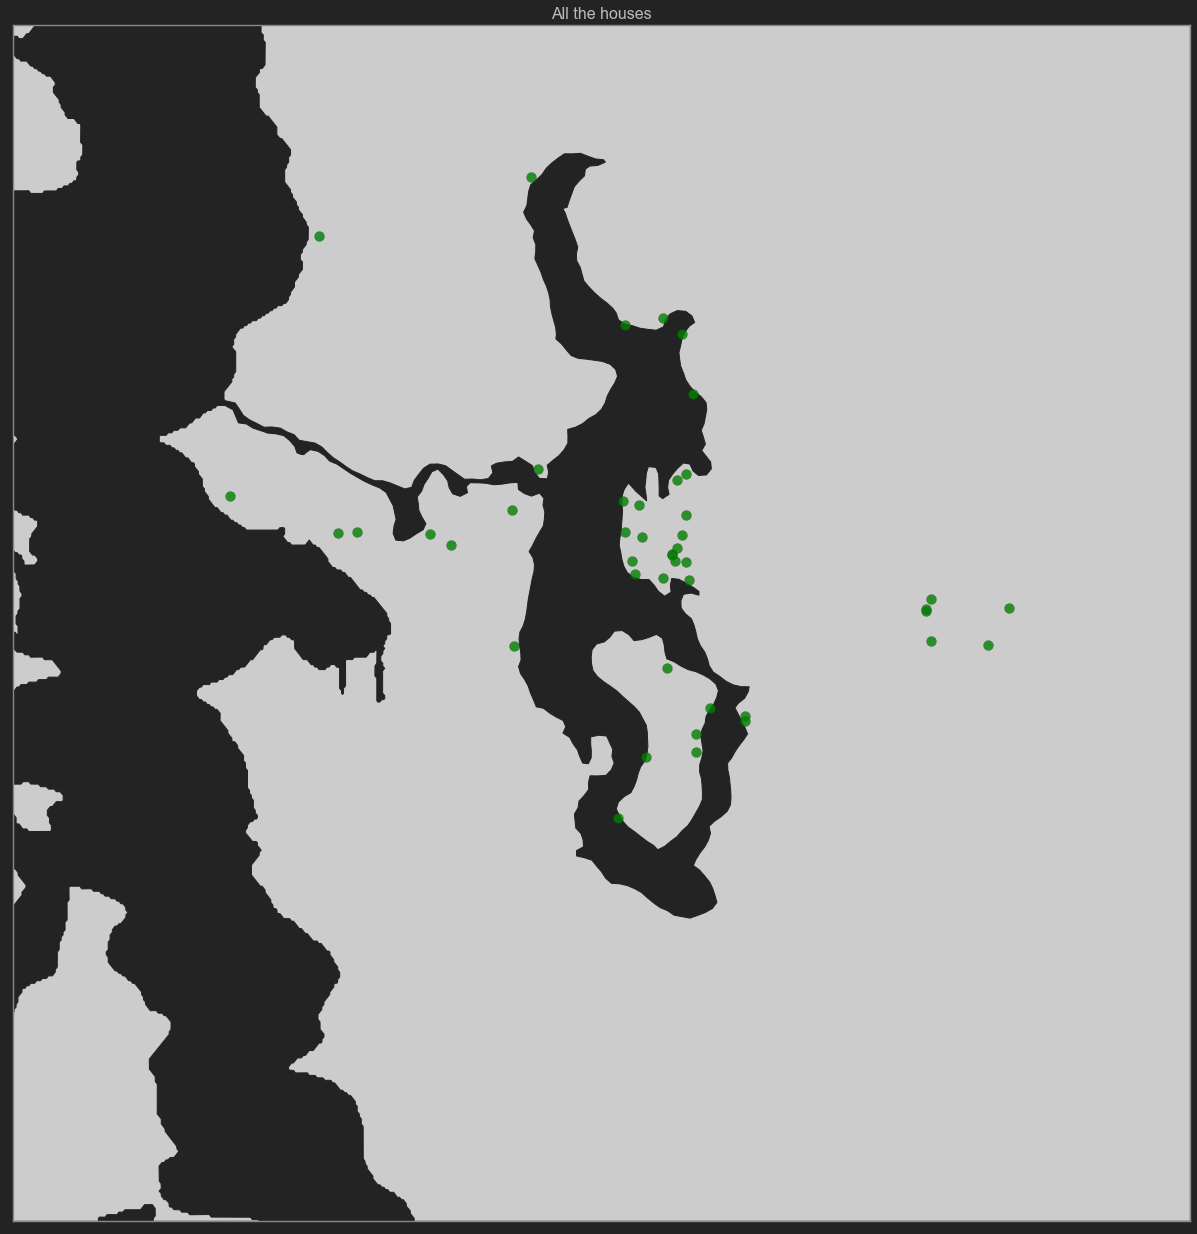

In [69]:
fig = plt.figure(figsize=(22,22))

m = Basemap(projection = 'mill',
           llcrnrlat = 47.4,
           urcrnrlat = 47.8,
            
           llcrnrlon = -122.5,
           urcrnrlon = -122,
            
           resolution = 'f')

m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents()

m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])

sites_lat_y = exp_house_lat.to_numpy()
sites_lon_x = exp_house_lng.to_numpy()

colors = ['green']

plt.hlines(y=47.65, xmin=-122.5, xmax=-121.5, colors='r', linestyles={'dashed'});
plt.vlines(x=-122.22, ymin=47.2, ymax=47.8, colors='r', linestyles={'dashed'});

m.scatter(sites_lon_x,
          sites_lat_y,
          latlon = True, 
          s = 100, 
          c = colors, 
          marker = 'o', 
          alpha = 0.8, 
          edgecolor = 'k', 
          linewidth = 0.2, 
          zorder = 2)

plt.title('All the houses', fontsize=16)

plt.show()

#### Seaborn simple scatterplot:

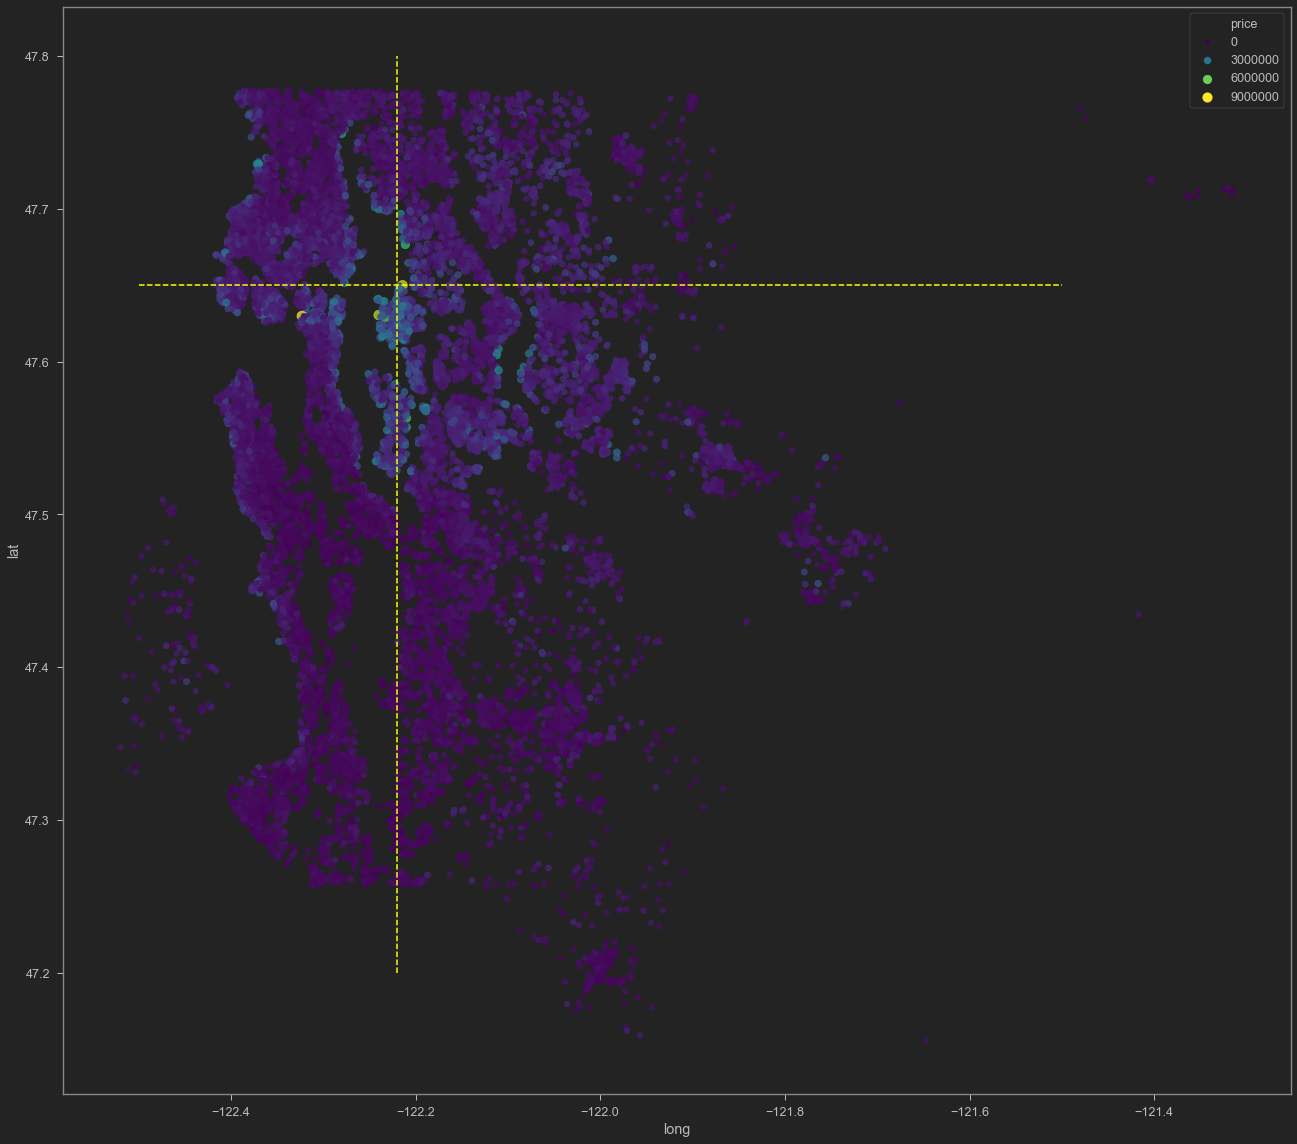

In [21]:
plt.figure(figsize=(22,20))
sns.scatterplot(x=df['long'], 
                y=df['lat'], 
                hue=df['price'],
                size=df['price'],
                alpha=0.75,
                edgecolor=None,
                palette='viridis');

plt.hlines(y=47.65, xmin=-122.5, xmax=-121.5, colors='yellow', linestyles={'dashed'});
plt.vlines(x=-122.22, ymin=47.2, ymax=47.8, colors='yellow', linestyles={'dashed'});

#### Filter 20 most expensive houses:

In [22]:
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


#### Filter out the most expensive houses above 1 mln. $:

In [23]:
df = df.loc[df['price'] < 2000000]

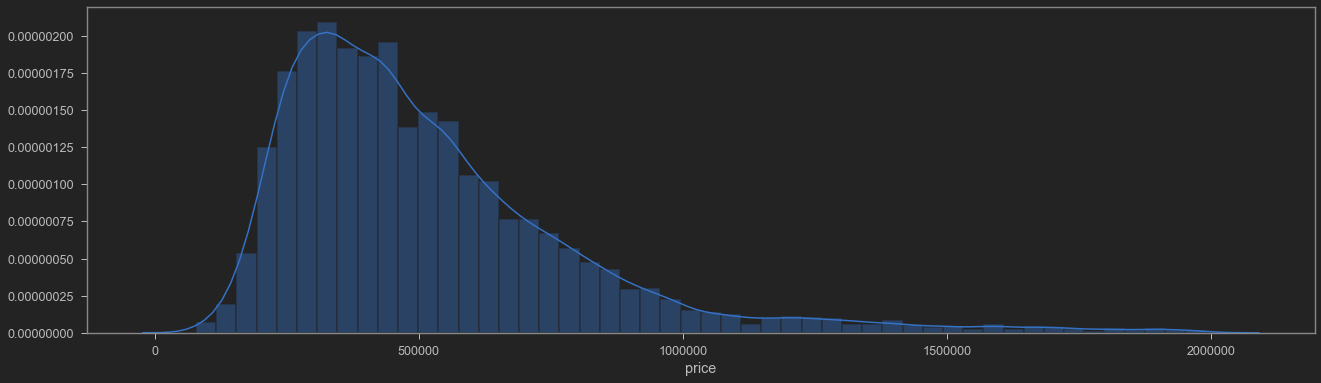

In [24]:
plt.figure(figsize=(22,6))
sns.distplot(df['price'], hist_kws=dict(edgecolor="k", linewidth=2));

#### Now clearer visualization:

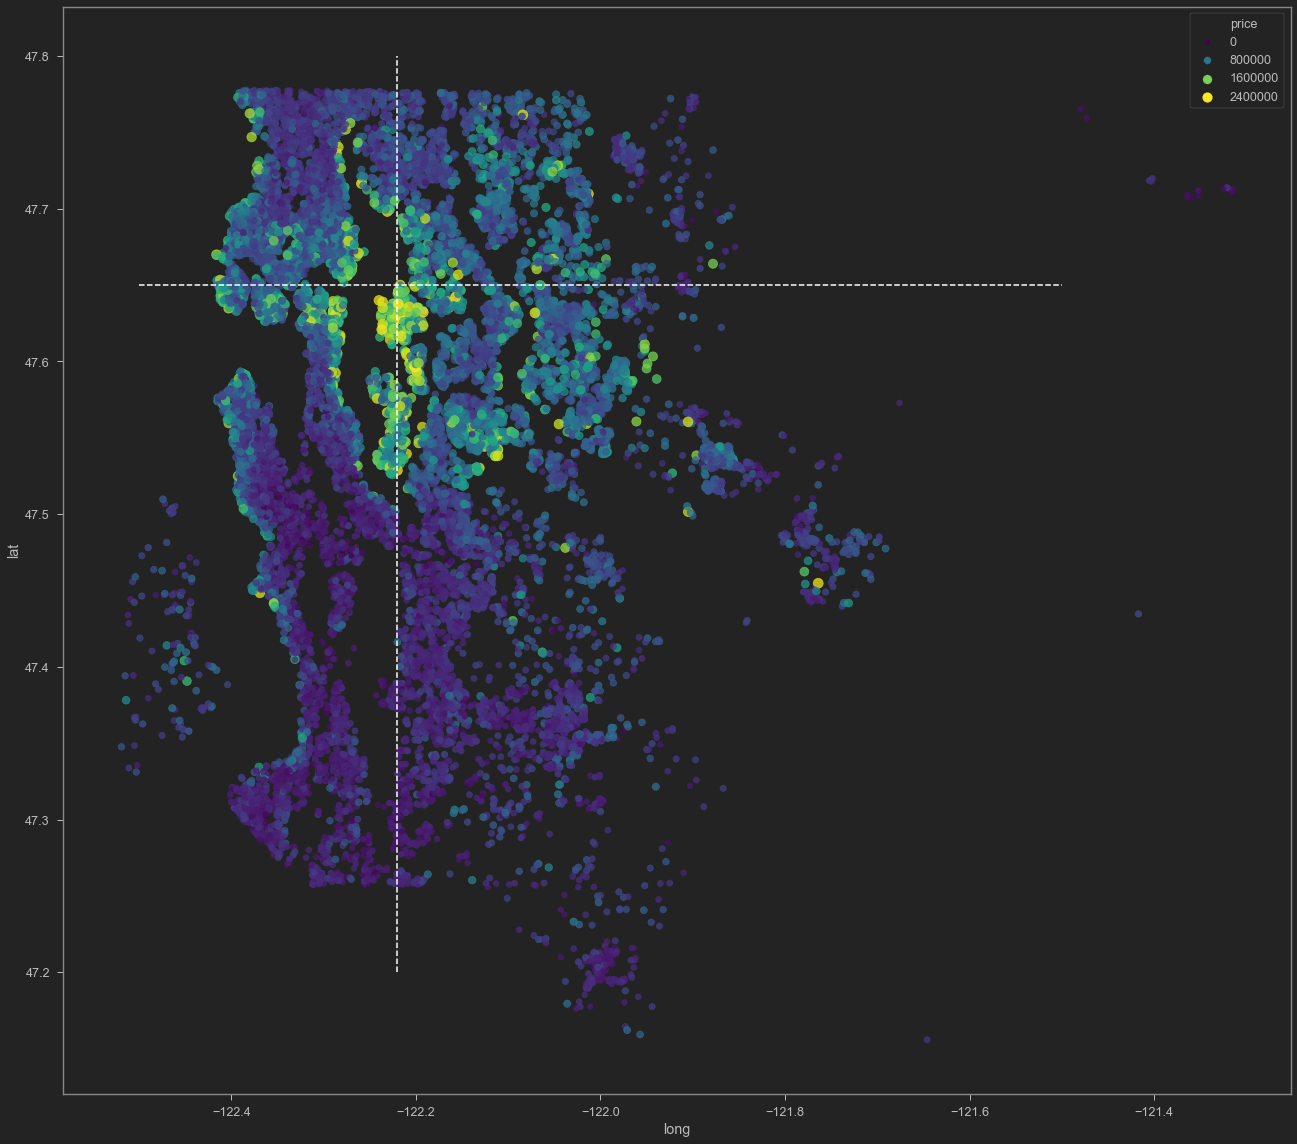

In [25]:
plt.figure(figsize=(22,20))
sns.scatterplot(x=df['long'], 
                y=df['lat'], 
                hue=df['price'],
                size=df['price'],
                alpha=0.75,
                edgecolor=None,
                palette='viridis');

plt.hlines(y=47.65, xmin=-122.5, xmax=-121.5, colors='w', linestyles={'dashed'});
plt.vlines(x=-122.22, ymin=47.2, ymax=47.8, colors='w', linestyles={'dashed'});

#### Land vs waterfront houses:

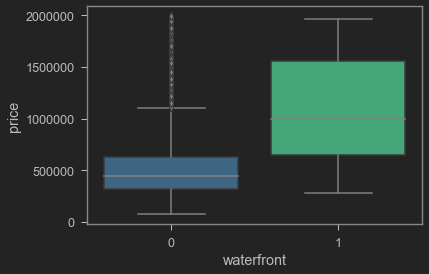

In [26]:
sns.boxplot(x=df['waterfront'], 
            y=df['price'],
            palette='viridis',
            flierprops=dict(markerfacecolor='grey'),
            whiskerprops=dict(color='grey'),
            capprops=dict(color='grey'),
            medianprops=dict(color='grey'));

## Feature engineering:

In [27]:
df = df.drop('id', axis=1)

In [28]:
df['date'] = pd.to_datetime(df['date'])

In [29]:
df['year'] = df['date'].apply(lambda record: record.year)
df['month'] = df['date'].apply(lambda record: record.month)

In [30]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


#### Price and month:

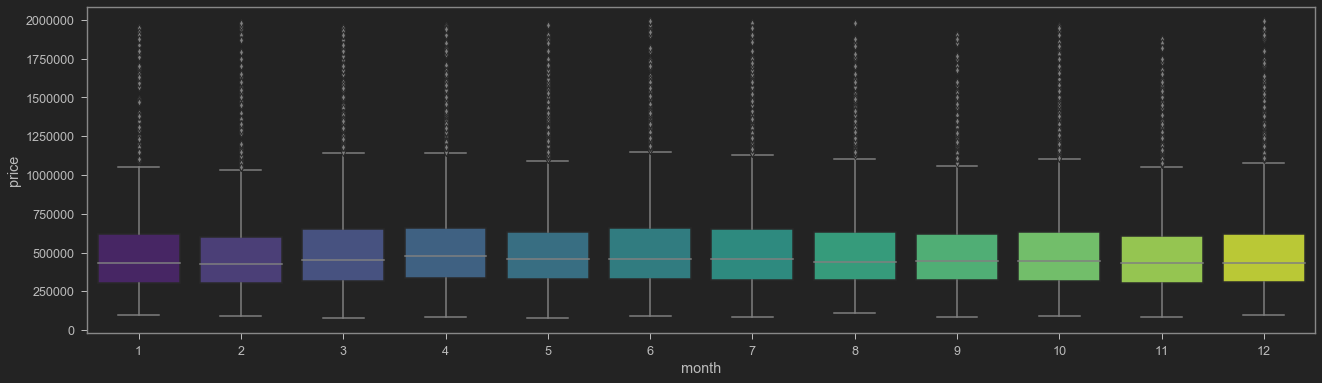

In [31]:
plt.figure(figsize=(22,6))
sns.boxplot(x=df['month'], 
            y=df['price'], 
            palette='viridis',
            flierprops=dict(markerfacecolor='grey'),
            whiskerprops=dict(color='grey'),
            capprops=dict(color='grey'),
            medianprops=dict(color='grey'));

#### Price per year:

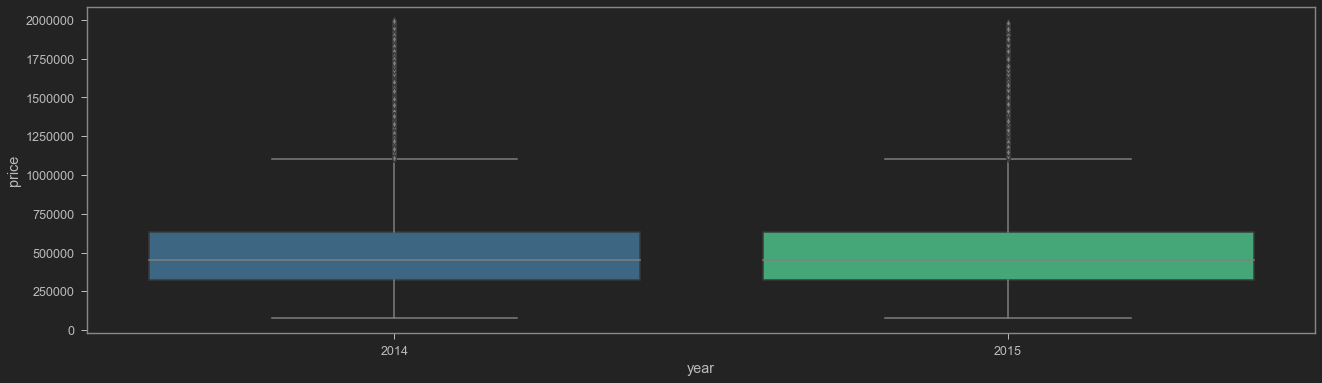

In [32]:
plt.figure(figsize=(22,6))
sns.boxplot(x=df['year'], 
            y=df['price'], 
            palette='viridis',
            flierprops=dict(markerfacecolor='grey'),
            whiskerprops=dict(color='grey'),
            capprops=dict(color='grey'),
            medianprops=dict(color='grey'));

#### With groupby:

In [33]:
df.groupby('month').mean()['price']

month
1     504981.466942
2     495661.423729
3     523761.809164
4     541452.515165
5     523547.980269
6     534779.668521
7     527357.010949
8     512093.043274
9     507255.324601
10    519494.580247
11    499781.279770
12    504427.098901
Name: price, dtype: float64

#### Grouped by month:

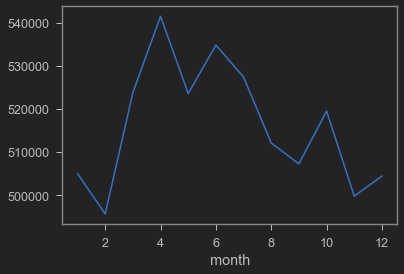

In [34]:
df.groupby('month').mean()['price'].plot();

#### Grouped by year:

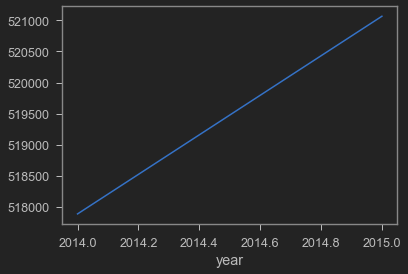

In [35]:
df.groupby('year').mean()['price'].plot();

In [36]:
df = df.drop('date', axis=1)

#### Zipcodes (categorical):

In [37]:
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058, 98001,
       98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008, 98059,
       98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010, 98118,
       98199, 98040, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [38]:
df['zipcode'].nunique()

70

70 dummy variables would be a lot... There are coordinates that can serve for this purpose as a continous variable.

In [39]:
df = df.drop('zipcode', axis=1)

In [40]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014,5
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2015,2
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,2014,6
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,2015,1


#### Waterfront:

In [41]:
df['waterfront'].unique()

array([0, 1], dtype=int64)

#### View:

In [42]:
df['view'].unique()

array([0, 3, 2, 4, 1], dtype=int64)

## Model:

In [43]:
X = df.drop('price', axis=1)  #.values
y = df['price']               #.values

#### Train test split:

In [44]:
from sklearn.model_selection import train_test_split

#train:       60%
#validation:  20%
#test:        20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

In [45]:
print(f'Training set: {len(X_train)}')
print(f'Validation set: {len(X_val)}')
print(f'Test set: {len(X_test)}')

Training set: 12833
Validation set: 4278
Test set: 4278


#### Scaling:

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [47]:
print(f'X Train: {X_train.shape}')
print(f'y Train: {y_train.shape}\n')

print(f'X Val: {X_val.shape}')
print(f'y Val: {y_val.shape}\n')

print(f'X Test: {X_test.shape}')
print(f'y Test: {y_test.shape}')

X Train: (12833, 19)
y Train: (12833,)

X Val: (4278, 19)
y Val: (4278,)

X Test: (4278, 19)
y Test: (4278,)


#### Artificial Neural Network (ANN) Model:

In [48]:
import tensorflow as tf

ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=19, activation='relu'))     #first layer
ann.add(tf.keras.layers.Dropout(rate=0.3))                      #first dropout
ann.add(tf.keras.layers.Dense(units=19, activation='relu'))
ann.add(tf.keras.layers.Dropout(rate=0.3))
ann.add(tf.keras.layers.Dense(units=19, activation='relu'))
ann.add(tf.keras.layers.Dropout(rate=0.3))

ann.add(tf.keras.layers.Dense(units=1))  #output layer, regression problem - no sigmoid or softmax!

#### Compile the model:

In [49]:
ann.compile(optimizer='adam', 
            loss='mse') 

#### Early stopping:

In [50]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',
                           mode='min',             #minimazing the validation loss, 'auto' usually works fine too
                           verbose=2,              #print feedback with the progress
                           patience=100)           #number of epochs to still do after detecting the stopping point

### <span style="color:Yellow">Training the model:</span>

In [51]:
ann.fit(x = X_train, 
        y = y_train,
        validation_data = (X_val, y_val),
        batch_size = 32, 
        epochs = 2000,
        callbacks = [early_stop])

Epoch 1/2000
402/402 [==============================] - 1s 2ms/step - loss: 347156447232.0000 - val_loss: 348523954176.0000
Epoch 2/2000
402/402 [==============================] - 1s 1ms/step - loss: 313505873920.0000 - val_loss: 267649662976.0000
Epoch 3/2000
402/402 [==============================] - 1s 2ms/step - loss: 188566781952.0000 - val_loss: 118785146880.0000
Epoch 4/2000
402/402 [==============================] - 1s 2ms/step - loss: 104708071424.0000 - val_loss: 72659935232.0000
Epoch 5/2000
402/402 [==============================] - 1s 2ms/step - loss: 89341698048.0000 - val_loss: 62629892096.0000
Epoch 6/2000
402/402 [==============================] - 1s 2ms/step - loss: 83193217024.0000 - val_loss: 56087912448.0000
Epoch 7/2000
402/402 [==============================] - 1s 2ms/step - loss: 77604495360.0000 - val_loss: 52134498304.0000
Epoch 8/2000
402/402 [==============================] - 1s 2ms/step - loss: 74322182144.0000 - val_loss: 47839776768.0000
Epoch 9/2000
402/

402/402 [==============================] - 0s 1ms/step - loss: 47474499584.0000 - val_loss: 25518379008.0000
Epoch 68/2000
402/402 [==============================] - 1s 2ms/step - loss: 47688830976.0000 - val_loss: 25267859456.0000
Epoch 69/2000
402/402 [==============================] - 1s 3ms/step - loss: 49434267648.0000 - val_loss: 25609207808.0000
Epoch 70/2000
402/402 [==============================] - 1s 1ms/step - loss: 48738328576.0000 - val_loss: 25113387008.0000
Epoch 71/2000
402/402 [==============================] - 1s 2ms/step - loss: 47081885696.0000 - val_loss: 25562535936.0000
Epoch 72/2000
402/402 [==============================] - 1s 1ms/step - loss: 47360651264.0000 - val_loss: 25370585088.0000
Epoch 73/2000
402/402 [==============================] - 1s 1ms/step - loss: 48591998976.0000 - val_loss: 24956018688.0000
Epoch 74/2000
402/402 [==============================] - 1s 1ms/step - loss: 47314042880.0000 - val_loss: 25449992192.0000
Epoch 75/2000
402/402 [=======

402/402 [==============================] - 1s 3ms/step - loss: 47450054656.0000 - val_loss: 25178107904.0000
Epoch 134/2000
402/402 [==============================] - 0s 1ms/step - loss: 47294279680.0000 - val_loss: 24313935872.0000
Epoch 135/2000
402/402 [==============================] - 0s 1ms/step - loss: 47852793856.0000 - val_loss: 24888465408.0000
Epoch 136/2000
402/402 [==============================] - 0s 1ms/step - loss: 46123659264.0000 - val_loss: 24341176320.0000
Epoch 137/2000
402/402 [==============================] - 0s 1ms/step - loss: 46246723584.0000 - val_loss: 25350295552.0000
Epoch 138/2000
402/402 [==============================] - 1s 1ms/step - loss: 47061815296.0000 - val_loss: 24662943744.0000
Epoch 139/2000
402/402 [==============================] - 1s 2ms/step - loss: 45768585216.0000 - val_loss: 25222686720.0000
Epoch 140/2000
402/402 [==============================] - 1s 3ms/step - loss: 47532163072.0000 - val_loss: 24057968640.0000
Epoch 141/2000
402/402 

402/402 [==============================] - 1s 1ms/step - loss: 45655269376.0000 - val_loss: 24019263488.0000
Epoch 200/2000
402/402 [==============================] - 0s 1ms/step - loss: 47340527616.0000 - val_loss: 24920760320.0000
Epoch 201/2000
402/402 [==============================] - 0s 1ms/step - loss: 46825381888.0000 - val_loss: 24379760640.0000
Epoch 202/2000
402/402 [==============================] - 1s 1ms/step - loss: 46515630080.0000 - val_loss: 24430833664.0000
Epoch 203/2000
402/402 [==============================] - 0s 1ms/step - loss: 46495617024.0000 - val_loss: 24798535680.0000
Epoch 204/2000
402/402 [==============================] - 0s 1ms/step - loss: 46034280448.0000 - val_loss: 24453961728.0000
Epoch 205/2000
402/402 [==============================] - 0s 1ms/step - loss: 45155672064.0000 - val_loss: 24190547968.0000
Epoch 206/2000
402/402 [==============================] - 1s 1ms/step - loss: 45857120256.0000 - val_loss: 24868653056.0000
Epoch 207/2000
402/402 

402/402 [==============================] - 1s 2ms/step - loss: 45067694080.0000 - val_loss: 24016762880.0000
Epoch 266/2000
402/402 [==============================] - 1s 1ms/step - loss: 46698119168.0000 - val_loss: 23847780352.0000
Epoch 267/2000
402/402 [==============================] - 1s 2ms/step - loss: 44935684096.0000 - val_loss: 24042237952.0000
Epoch 268/2000
402/402 [==============================] - 1s 2ms/step - loss: 46406475776.0000 - val_loss: 23890313216.0000
Epoch 269/2000
402/402 [==============================] - 1s 2ms/step - loss: 45266903040.0000 - val_loss: 23758899200.0000
Epoch 270/2000
402/402 [==============================] - 1s 1ms/step - loss: 44550328320.0000 - val_loss: 23584911360.0000
Epoch 271/2000
402/402 [==============================] - 1s 1ms/step - loss: 45135843328.0000 - val_loss: 24003229696.0000
Epoch 272/2000
402/402 [==============================] - 1s 1ms/step - loss: 46321500160.0000 - val_loss: 24068730880.0000
Epoch 273/2000
402/402 

402/402 [==============================] - 1s 1ms/step - loss: 44332855296.0000 - val_loss: 24291872768.0000
Epoch 332/2000
402/402 [==============================] - 1s 2ms/step - loss: 44340740096.0000 - val_loss: 23929446400.0000
Epoch 333/2000
402/402 [==============================] - 0s 1ms/step - loss: 45699358720.0000 - val_loss: 24276764672.0000
Epoch 334/2000
402/402 [==============================] - 0s 1ms/step - loss: 44496982016.0000 - val_loss: 23829569536.0000
Epoch 335/2000
402/402 [==============================] - 1s 1ms/step - loss: 44489498624.0000 - val_loss: 24216764416.0000
Epoch 336/2000
402/402 [==============================] - 0s 1ms/step - loss: 43886399488.0000 - val_loss: 23417292800.0000
Epoch 337/2000
402/402 [==============================] - 1s 1ms/step - loss: 44075474944.0000 - val_loss: 23978835968.0000
Epoch 338/2000
402/402 [==============================] - 1s 1ms/step - loss: 44307558400.0000 - val_loss: 23461341184.0000
Epoch 339/2000
402/402 

402/402 [==============================] - 0s 1ms/step - loss: 43624423424.0000 - val_loss: 23774599168.0000
Epoch 398/2000
402/402 [==============================] - 1s 1ms/step - loss: 42463109120.0000 - val_loss: 23326846976.0000
Epoch 399/2000
402/402 [==============================] - 0s 1ms/step - loss: 44857630720.0000 - val_loss: 23429900288.0000
Epoch 400/2000
402/402 [==============================] - 0s 1ms/step - loss: 43897761792.0000 - val_loss: 23414267904.0000
Epoch 401/2000
402/402 [==============================] - 1s 1ms/step - loss: 43639042048.0000 - val_loss: 23398629376.0000
Epoch 402/2000
402/402 [==============================] - 1s 1ms/step - loss: 44408258560.0000 - val_loss: 24004743168.0000
Epoch 403/2000
402/402 [==============================] - 1s 1ms/step - loss: 44189491200.0000 - val_loss: 23588147200.0000
Epoch 404/2000
402/402 [==============================] - 1s 1ms/step - loss: 45108535296.0000 - val_loss: 23348221952.0000
Epoch 405/2000
402/402 

402/402 [==============================] - 1s 2ms/step - loss: 42417332224.0000 - val_loss: 22865592320.0000
Epoch 464/2000
402/402 [==============================] - 1s 2ms/step - loss: 42433179648.0000 - val_loss: 23024715776.0000
Epoch 465/2000
402/402 [==============================] - 1s 2ms/step - loss: 42383126528.0000 - val_loss: 23215497216.0000
Epoch 466/2000
402/402 [==============================] - 1s 2ms/step - loss: 42243182592.0000 - val_loss: 22768861184.0000
Epoch 467/2000
402/402 [==============================] - 1s 2ms/step - loss: 43377438720.0000 - val_loss: 23125209088.0000
Epoch 468/2000
402/402 [==============================] - 1s 2ms/step - loss: 41877831680.0000 - val_loss: 22981681152.0000
Epoch 469/2000
402/402 [==============================] - 1s 2ms/step - loss: 42838294528.0000 - val_loss: 23974656000.0000
Epoch 470/2000
402/402 [==============================] - 0s 1ms/step - loss: 43296145408.0000 - val_loss: 23491788800.0000
Epoch 471/2000
402/402 

402/402 [==============================] - 1s 1ms/step - loss: 42008088576.0000 - val_loss: 23244898304.0000
Epoch 530/2000
402/402 [==============================] - 1s 2ms/step - loss: 41872670720.0000 - val_loss: 22761857024.0000
Epoch 531/2000
402/402 [==============================] - 0s 1ms/step - loss: 42670837760.0000 - val_loss: 23031138304.0000
Epoch 532/2000
402/402 [==============================] - 0s 1ms/step - loss: 42106810368.0000 - val_loss: 23415695360.0000
Epoch 533/2000
402/402 [==============================] - 0s 1ms/step - loss: 42018230272.0000 - val_loss: 23207452672.0000
Epoch 534/2000
402/402 [==============================] - 0s 1ms/step - loss: 41639485440.0000 - val_loss: 23379431424.0000
Epoch 535/2000
402/402 [==============================] - 1s 1ms/step - loss: 42725756928.0000 - val_loss: 23801208832.0000
Epoch 536/2000
402/402 [==============================] - 0s 1ms/step - loss: 41088933888.0000 - val_loss: 22889482240.0000
Epoch 537/2000
402/402 

402/402 [==============================] - 1s 1ms/step - loss: 41727647744.0000 - val_loss: 22994143232.0000
Epoch 596/2000
402/402 [==============================] - 1s 2ms/step - loss: 42241810432.0000 - val_loss: 23196784640.0000
Epoch 597/2000
402/402 [==============================] - 1s 1ms/step - loss: 41495601152.0000 - val_loss: 22877915136.0000
Epoch 598/2000
402/402 [==============================] - 1s 2ms/step - loss: 41769017344.0000 - val_loss: 23754006528.0000
Epoch 599/2000
402/402 [==============================] - 1s 2ms/step - loss: 41656360960.0000 - val_loss: 24036857856.0000
Epoch 600/2000
402/402 [==============================] - 1s 1ms/step - loss: 42512457728.0000 - val_loss: 22842175488.0000
Epoch 601/2000
402/402 [==============================] - 1s 1ms/step - loss: 40634454016.0000 - val_loss: 23615741952.0000
Epoch 602/2000
402/402 [==============================] - 1s 1ms/step - loss: 41778561024.0000 - val_loss: 22860490752.0000
Epoch 00602: early stop

#### Model history:

In [52]:
model_history = pd.DataFrame(ann.history.history)

#### Model loss:

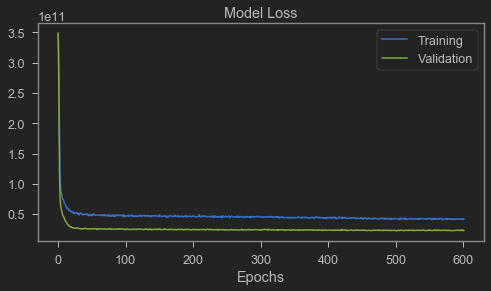

In [53]:
plt.figure(figsize=(8,4))

plt.plot(model_history['loss'], label='Training');
plt.plot(model_history['val_loss'], label='Validation');

plt.legend(loc='best')
plt.xlabel('Epochs')
plt.title('Model Loss')
plt.show()

#### Metrics:

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

predictions = ann.predict(X_test)

#### Mean squared error:

In [55]:
mean_squared_error(y_test, predictions)

23656002821.87856

#### Mean absolute error:

In [56]:
mean_absolute_error(y_test, predictions)

100457.5518787985

In [57]:
print(f'In average, we are off by: {np.round(mean_absolute_error(y_test, predictions)/y_test.mean()*100, 1)}%')

In average, we are off by: 19.2%


#### Explained variance:

In [58]:
explained_variance_score(y_test, predictions)

0.73123444181075

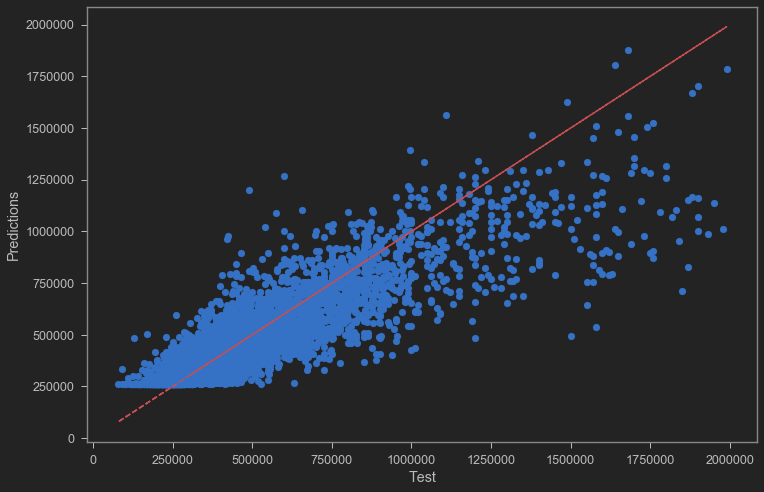

In [59]:
plt.figure(figsize=(12,8))

plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, c='r', linestyle='dashed');

plt.xlabel('Test')
plt.ylabel('Predictions')
plt.show()

#### Comparison with Regplot:

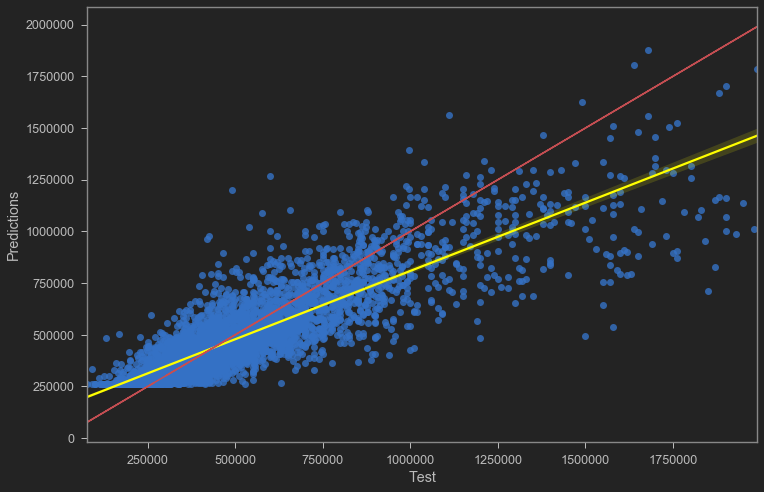

In [60]:
predictions_df = pd.DataFrame({'Predictions': predictions.flatten(), 'Test': y_test})

plt.figure(figsize=(12,8))

sns.regplot(x='Test', 
            y='Predictions', 
            data=predictions_df, 
            line_kws={'color': 'yellow'});            #computed fit

plt.plot(y_test, y_test, c='r', linestyle='solid');   #ideal fit

#### ANN R2-score:

In [61]:
from sklearn.metrics import r2_score

ann_r2_score = r2_score(y_test, predictions)
ann_r2_score

0.7209103309221864

## Compare with other regression models:

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn import model_selection

R2_scores = []
    
models = [('MLR', LinearRegression()),
          ('DT', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor(n_estimators=10)),
          ('XGB', XGBRegressor())]
    
for name, model in models:
    
    print(f'Current model: {model} \n')
    
    model.fit(X_train, y_train)
    R2_score = model_selection.cross_val_score(model, X_val, y_val, cv=10, scoring='r2')
    
    R2_scores.append(R2_score)

Current model: LinearRegression() 

Current model: DecisionTreeRegressor() 

Current model: RandomForestRegressor(n_estimators=10) 

Current model: XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None) 



In [63]:
mean_R2_scores = [result.mean() for result in R2_scores]
mean_R2_scores

[0.7062365600619422,
 0.7044027600347413,
 0.8373913985141461,
 0.8640971648139468]

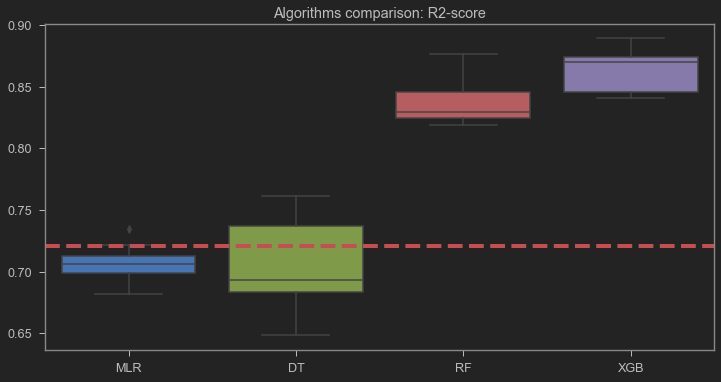

In [64]:
r2_scores_df = pd.DataFrame(np.transpose(R2_scores), columns=['MLR', 'DT', 'RF', 'XGB'])

plt.figure(figsize=(12,6))
sns.boxplot(data=r2_scores_df).set_title('Algorithms comparison: R2-score');  #other algoithms
plt.axhline(y=ann_r2_score, linewidth=4, color='r', linestyle='--');          #ANN single score

Looks like XGB is the winner. SVR was very poor.

## XGB:

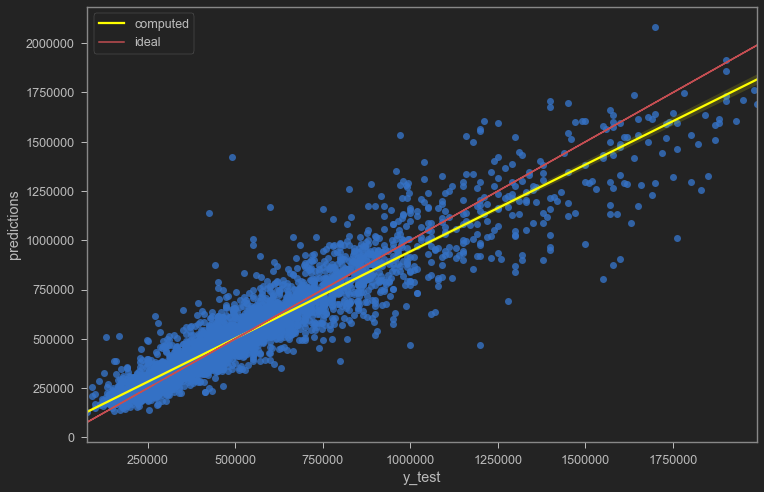

In [65]:
model_XGB = XGBRegressor()
model_XGB.fit(X_train, y_train)
predictions_XGB = model_XGB.predict(X_test)

pred_df = pd.DataFrame({'y_test':y_test, 'predictions':predictions_XGB})

plt.figure(figsize=(12,8))
sns.regplot(x='y_test', 
           y='predictions', 
           data=pred_df,
           line_kws={'color': 'yellow', 'label':'computed'});        #computed fit
plt.plot(y_test, y_test, c='r', linestyle='solid', label='ideal');   #ideal fit

plt.legend(loc='best');

#### Total time:

In [66]:
print(datetime.now() - startTime)

0:07:48.521455
